In [1]:
import pandas as pd
import numpy as np

# Helper Functions
import wrangle as w 
import explore as exp
from explore import rfe, split, select_kbest

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Hypothesis tests
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

#Feature Engineering
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import RFE
from scipy import stats

# Split data
from sklearn.model_selection import train_test_split

# Evaluate models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support 

# Create models for classification ML:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [2]:
df = w.wrangle_data(cached=True)

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.isnull().sum()

age                                            0
gender                                         0
race                                           0
date                                           0
city                                           0
state                                          0
zipcode                                        0
county                                         0
agency_responsible                             0
cause_of_death                                 0
description_of_circumstances                   0
official_disposition                           0
criminal_charges_filed                         0
mental_illness                                 0
armed_unarmed_status                           0
alleged_weapon                                 0
alleged_threat_lvl                             0
fleeing                                        0
body_camera                                    0
geography                                      0
encounter_type_draft

In [5]:
df.age.value_counts()

0     233
31    211
25    210
32    200
30    198
     ... 
10      1
12      1
1       1
88      1
85      1
Name: age, Length: 81, dtype: int64

In [6]:
df.age_bins.value_counts()

25-34       1957
35-44       1476
45-54        919
18-24        870
55-64        501
unknown      233
65+          189
12-17        115
under 12       5
Name: age_bins, dtype: int64

In [7]:
df.columns

Index(['age', 'gender', 'race', 'date', 'city', 'state', 'zipcode', 'county',
       'agency_responsible', 'cause_of_death', 'description_of_circumstances',
       'official_disposition', 'criminal_charges_filed', 'mental_illness',
       'armed_unarmed_status', 'alleged_weapon', 'alleged_threat_lvl',
       'fleeing', 'body_camera', 'geography', 'encounter_type_draft',
       'initial_reported_reason_for_encounter_draft',
       'known_past_shootings_of_officer_draft', 'is_female', 'is_male',
       'is_transgender', 'was_fleeing', 'was_not fleeing ',
       'was_allegedly_armed', 'was_unarmed', 'was_vehicle',
       'was_domestic_disturbance', 'was_mental_health_welfare_check',
       'was_person_with_a_weapon', 'was_traffic_stop',
       'was_violent_crime_part_1', 'is_asian/pacific islander', 'is_black',
       'is_hispanic', 'is_native american', 'is_unknown race', 'is_white',
       'mntlill_drug or alcohol use', 'mntlill_no', 'mntlill_unknown',
       'mntlill_yes', 'rural', 'su

In [8]:
from explore import rfe, split, select_kbest

In [9]:
train, validate, test = split(df, stratify_by='alleged_threat_lvl')

In [10]:

def split_df(df, target, seed):
    '''
    split_df will take one argument(df) and 
    then split our data into 20/80, 
    then split the 80% into 30/70
    performs a train, validate, test split
    splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 6 dataframes and 3 series:
    train, validate, test split, X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # Train, Validate, and test
    train_and_validate, test = train_test_split(df, test_size=0.2, random_state=seed)
    train, validate = train_test_split(train_and_validate, test_size=0.3, random_state=seed)
    # Split with X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test 

In [11]:

train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_df(df, 'alleged_threat_lvl', 42)

In [12]:
df.geography.value_counts()

suburban    3180
urban       1645
rural       1440
Name: geography, dtype: int64

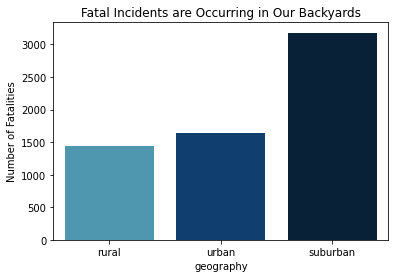

In [13]:
sns.countplot(data=df, x='geography', palette='ocean_r')
plt.title("Fatal Incidents are Occurring in Our Backyards")
plt.ylabel('Number of Fatalities')
plt.show()

In [14]:
#y_

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3508 entries, 4142 to 5708
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          3508 non-null   int64  
 1   gender                                       3508 non-null   object 
 2   race                                         3508 non-null   object 
 3   date                                         3508 non-null   object 
 4   city                                         3508 non-null   object 
 5   state                                        3508 non-null   object 
 6   zipcode                                      3508 non-null   float64
 7   county                                       3508 non-null   object 
 8   agency_responsible                           3508 non-null   object 
 9   cause_of_death                               3508 non-null   object 
 1

In [16]:
from sklearn.feature_selection import f_regression, RFE, SelectKBest

In [17]:
list(df.columns)

['age',
 'gender',
 'race',
 'date',
 'city',
 'state',
 'zipcode',
 'county',
 'agency_responsible',
 'cause_of_death',
 'description_of_circumstances',
 'official_disposition',
 'criminal_charges_filed',
 'mental_illness',
 'armed_unarmed_status',
 'alleged_weapon',
 'alleged_threat_lvl',
 'fleeing',
 'body_camera',
 'geography',
 'encounter_type_draft',
 'initial_reported_reason_for_encounter_draft',
 'known_past_shootings_of_officer_draft',
 'is_female',
 'is_male',
 'is_transgender',
 'was_fleeing',
 'was_not fleeing ',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_domestic_disturbance',
 'was_mental_health_welfare_check',
 'was_person_with_a_weapon',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'is_asian/pacific islander',
 'is_black',
 'is_hispanic',
 'is_native american',
 'is_unknown race',
 'is_white',
 'mntlill_drug or alcohol use',
 'mntlill_no',
 'mntlill_unknown',
 'mntlill_yes',
 'rural',
 'suburban',
 'urban',
 'cod_lethal',
 'age_bins',
 'unknown'

In [18]:
dropcols = ['date',
 'gender',
 'race',
 'city',
 'state',
 'zipcode',
 'county',
 'agency_responsible',
 'cause_of_death',
 'description_of_circumstances',
 'official_disposition',
 'criminal_charges_filed',
 'mental_illness',
 'armed_unarmed_status',
 'alleged_threat_lvl',
 'alleged_weapon',
 'fleeing',
 'geography',
 'encounter_type_draft',
 'initial_reported_reason_for_encounter_draft',
 'known_past_shootings_of_officer_draft',
 'age_bins']


In [19]:
train2 = train.drop(columns=dropcols)
validate2 = validate.drop(columns=dropcols)
test2 = test.drop(columns=dropcols)

In [20]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3508 entries, 4142 to 5708
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              3508 non-null   int64  
 1   body_camera                      3508 non-null   float64
 2   is_female                        3508 non-null   int64  
 3   is_male                          3508 non-null   int64  
 4   is_transgender                   3508 non-null   int64  
 5   was_fleeing                      3508 non-null   float64
 6   was_not fleeing                  3508 non-null   float64
 7   was_allegedly_armed              3508 non-null   float64
 8   was_unarmed                      3508 non-null   float64
 9   was_vehicle                      3508 non-null   float64
 10  was_domestic_disturbance         3508 non-null   int64  
 11  was_mental_health_welfare_check  3508 non-null   int64  
 12  was_person_with_a

In [21]:
train2.columns

Index(['age', 'body_camera', 'is_female', 'is_male', 'is_transgender',
       'was_fleeing', 'was_not fleeing ', 'was_allegedly_armed', 'was_unarmed',
       'was_vehicle', 'was_domestic_disturbance',
       'was_mental_health_welfare_check', 'was_person_with_a_weapon',
       'was_traffic_stop', 'was_violent_crime_part_1',
       'is_asian/pacific islander', 'is_black', 'is_hispanic',
       'is_native american', 'is_unknown race', 'is_white',
       'mntlill_drug or alcohol use', 'mntlill_no', 'mntlill_unknown',
       'mntlill_yes', 'rural', 'suburban', 'urban', 'cod_lethal', 'unknown',
       'under 12', '12-17', '18-24', '25-34', '35-44', '45-54', '55-64',
       '65+'],
      dtype='object')

In [22]:
f_feature = select_kbest(train2, y_train, 15)
f_feature

['age',
 'body_camera',
 'is_transgender',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_mental_health_welfare_check',
 'was_violent_crime_part_1',
 'is_hispanic',
 'is_white',
 'mntlill_no',
 'mntlill_yes',
 'rural',
 '55-64',
 '65+']

In [23]:
rfe_list = rfe(train2, y_train, 15)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

In [24]:
f_feature

['age',
 'body_camera',
 'is_transgender',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_mental_health_welfare_check',
 'was_violent_crime_part_1',
 'is_hispanic',
 'is_white',
 'mntlill_no',
 'mntlill_yes',
 'rural',
 '55-64',
 '65+']

In [25]:
rfe_list

['is_female',
 'is_male',
 'is_transgender',
 'was_not fleeing ',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_person_with_a_weapon',
 'is_black',
 'is_unknown race',
 'is_white',
 'mntlill_drug or alcohol use',
 'mntlill_yes',
 'cod_lethal',
 '65+']

In [26]:
combo_feats = list(set(f_feature + rfe_list))

In [27]:
len(combo_feats)

23

In [28]:
combo_feats

['65+',
 'is_female',
 'cod_lethal',
 'is_black',
 'was_unarmed',
 'was_vehicle',
 'was_violent_crime_part_1',
 'rural',
 'is_transgender',
 'was_not fleeing ',
 'was_allegedly_armed',
 '55-64',
 'is_unknown race',
 'is_male',
 'body_camera',
 'age',
 'is_white',
 'was_mental_health_welfare_check',
 'mntlill_yes',
 'is_hispanic',
 'mntlill_no',
 'mntlill_drug or alcohol use',
 'was_person_with_a_weapon']

# KNN
## Train


In [29]:
df.alleged_threat_lvl.value_counts()

1.0    4242
0.0    2023
Name: alleged_threat_lvl, dtype: int64

In [30]:
(train.alleged_threat_lvl == 0).mean()

0.3221208665906499

In [31]:
def get_metrics(mod, X, y):
    """
    get_metrics returns the baseline accuracy score 
    along with the current model's accuracy score for comparison 
    along with a table of precision/recall/f1-score/support percentages of the model
    """
    baseline_accuracy = (train.alleged_threat_lvl == 0).mean()
    y_pred = mod.predict(X)
    accuracy = mod.score(X, y)
    conf = confusion_matrix(y, y_pred)
    prfs = pd.DataFrame(precision_recall_fscore_support(y, y_pred), index=['precision', 'recall', 'f1-score', 'support'])
    
    print(f'''
    BASELINE accuracy is: {baseline_accuracy:.2%}
    The accuracy for our model is: {accuracy:.5%} 
    ''')
    return conf, prfs

In [32]:
combo_feats = ['55-64',
 'is_native american',
 'mntlill_no',
 'under 12',
 'was_traffic_stop',
 'body_camera',
 'age',
 'was_allegedly_armed',
 'is_black',
 'was_domestic_disturbance',
 'was_fleeing',
 'cod_lethal',
 'was_mental_health_welfare_check',
 'is_white',
 'was_violent_crime_part_1',
 'was_vehicle',
 'mntlill_drug or alcohol use',
 'is_transgender',
 'is_female']

In [33]:
train2[f_feature]

,age,body_camera,is_transgender,was_allegedly_armed,was_unarmed,was_vehicle,was_mental_health_welfare_check,was_violent_crime_part_1,is_hispanic,is_white,mntlill_no,mntlill_yes,rural,55-64,65+
4142,47,1.0,0,1.0,0.0,0.0,0,1,0,0,1,0,0.0,0,0
3650,24,0.0,0,1.0,0.0,0.0,0,0,0,1,1,0,1.0,0,0
5846,45,0.0,0,1.0,0.0,0.0,0,1,0,1,1,0,0.0,0,0
3588,37,0.0,0,1.0,0.0,0.0,0,1,0,0,1,0,0.0,0,0
744,62,0.0,0,1.0,0.0,0.0,0,0,0,0,0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705,30,0.0,0,1.0,0.0,0.0,0,1,1,0,1,0,0.0,0,0
4041,28,0.0,0,0.0,0.0,1.0,0,1,0,0,0,1,0.0,0,0
4886,38,0.0,0,0.0,1.0,0.0,0,1,0,1,1,0,0.0,0,0
4242,49,0.0,0,0.0,1.0,0.0,0,1,0,1,0,0,0.0,0,0


In [34]:
# Create KNN object (thing)
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[f_feature], y_train)

KNeighborsClassifier()

In [35]:
# Use the model (thing)
# Select k Best features
get_metrics(knn, train[f_feature], y_train)


    BASELINE accuracy is: 32.21%
    The accuracy for our model is: 73.63170% 
    


(array([[ 414,  716],
        [ 209, 2169]]),
                      0            1
 precision     0.664526     0.751820
 recall        0.366372     0.912111
 f1-score      0.472333     0.824245
 support    1130.000000  2378.000000)

In [36]:
# Create KNN object (thing)
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[rfe_list], y_train)

KNeighborsClassifier()

In [37]:
# Use the model (thing)
# Select k Best features
get_metrics(knn, train[rfe_list], y_train)


    BASELINE accuracy is: 32.21%
    The accuracy for our model is: 68.01596% 
    


(array([[ 372,  758],
        [ 364, 2014]]),
                      0            1
 precision     0.505435     0.726551
 recall        0.329204     0.846930
 f1-score      0.398714     0.782136
 support    1130.000000  2378.000000)

In [38]:
# Create KNN object (thing)
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[combo_feats], y_train)

KNeighborsClassifier()

In [39]:
# Use the model (thing)
# Select k Best features
get_metrics(knn, train[combo_feats], y_train)


    BASELINE accuracy is: 32.21%
    The accuracy for our model is: 74.57241% 
    


(array([[ 432,  698],
        [ 194, 2184]]),
                      0            1
 precision     0.690096     0.757807
 recall        0.382301     0.918419
 f1-score      0.492027     0.830418
 support    1130.000000  2378.000000)

## Validate

In [40]:
# Create KNN object (thing)
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[f_feature], y_train)

KNeighborsClassifier()

In [41]:
# Use the model (thing)
# Select k Best features
get_metrics(knn, validate[f_feature], y_validate)


    BASELINE accuracy is: 32.21%
    The accuracy for our model is: 63.49734% 
    


(array([[112, 388],
        [161, 843]]),
                     0            1
 precision    0.410256     0.684809
 recall       0.224000     0.839641
 f1-score     0.289780     0.754362
 support    500.000000  1004.000000)

In [42]:
# Create KNN object (thing)
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[rfe_list], y_train)

KNeighborsClassifier()

In [43]:
# Use the model (thing)
# Select k Best features
get_metrics(knn, validate[rfe_list], y_validate)


    BASELINE accuracy is: 32.21%
    The accuracy for our model is: 65.09309% 
    


(array([[151, 349],
        [176, 828]]),
                     0            1
 precision    0.461774     0.703483
 recall       0.302000     0.824701
 f1-score     0.365175     0.759285
 support    500.000000  1004.000000)

In [44]:
# Create KNN object (thing)
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[combo_feats], y_train)

KNeighborsClassifier()

In [45]:
# Use the model (thing)
# Select k Best features
get_metrics(knn, validate[combo_feats], y_validate)


    BASELINE accuracy is: 32.21%
    The accuracy for our model is: 63.69681% 
    


(array([[ 96, 404],
        [142, 862]]),
                     0            1
 precision    0.403361     0.680885
 recall       0.192000     0.858566
 f1-score     0.260163     0.759471
 support    500.000000  1004.000000)

Modeling

Create a Baseline Model:

In [46]:
y_train = pd.DataFrame(y_train)

y_train.alleged_threat_lvl.value_counts()


1.0    2378
0.0    1130
Name: alleged_threat_lvl, dtype: int64

In [47]:
baseline = 0
baseline_accuracy = round((y_train.alleged_threat_lvl == baseline).mean(),4)
baseline_accuracy
print(f'Baseline accuracy is {baseline_accuracy}')

Baseline accuracy is 0.3221





Random Forest 

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# create the model 
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)



In [49]:
# fit the model
rf.fit(train2, y_train)


# Find feature importance
print(rf.feature_importances_)



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[0.050445   0.01960306 0.00967701 0.01014124 0.00338965 0.01179578
 0.         0.3205173  0.11711505 0.02289323 0.01052646 0.01436981
 0.00565214 0.00289052 0.04990279 0.00851644 0.00911022 0.03896344
 0.00765382 0.00150679 0.01994885 0.00543419 0.03424818 0.00883928
 0.02465709 0.01966089 0.00950413 0.00555056 0.10846197 0.00418416
 0.         0.00383472 0.0061636  0.00351938 0.00665933 0.00326851
 0.00672891 0.0146665 ]


In [50]:
train2.columns

Index(['age', 'body_camera', 'is_female', 'is_male', 'is_transgender',
       'was_fleeing', 'was_not fleeing ', 'was_allegedly_armed', 'was_unarmed',
       'was_vehicle', 'was_domestic_disturbance',
       'was_mental_health_welfare_check', 'was_person_with_a_weapon',
       'was_traffic_stop', 'was_violent_crime_part_1',
       'is_asian/pacific islander', 'is_black', 'is_hispanic',
       'is_native american', 'is_unknown race', 'is_white',
       'mntlill_drug or alcohol use', 'mntlill_no', 'mntlill_unknown',
       'mntlill_yes', 'rural', 'suburban', 'urban', 'cod_lethal', 'unknown',
       'under 12', '12-17', '18-24', '25-34', '35-44', '45-54', '55-64',
       '65+'],
      dtype='object')

In [51]:
# make predictions
y_pred = rf.predict(train2)

# estimate probability
y_pred_proba = rf.predict_proba(train2)


#Compute accuracy
train_accuracy = round(rf.score(train2, y_train),2)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(train2, y_train)))


Accuracy of random forest classifier on training set: 0.69


In [52]:
# run classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.03      0.06      1130
         1.0       0.68      1.00      0.81      2378

    accuracy                           0.69      3508
   macro avg       0.79      0.51      0.44      3508
weighted avg       0.75      0.69      0.57      3508



In [53]:
# fit the model on validate
rf.fit(validate2, y_validate)

# make predictions
y_pred_val = rf.predict(validate2)

# estimate probability
y_pred_val_proba = rf.predict_proba(validate2)

#Compute accuracy
validate_accuracy = round(rf.score(validate2, y_validate),2)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(validate2, y_validate)))


Accuracy of random forest classifier on validate set: 0.68


In [54]:
# run classification report on validate
print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.91      0.06      0.11       500
         1.0       0.68      1.00      0.81      1004

    accuracy                           0.68      1504
   macro avg       0.79      0.53      0.46      1504
weighted avg       0.76      0.68      0.58      1504



In [55]:
def get_metrics_bin(clf, X, y):
    '''
    get_metrics_bin will take in a sklearn classifier model, an X and a y variable and utilize
    the model to make a prediction and then gather accuracy, class report evaluations

    return:  a classification report as a pandas DataFrame
    '''
    y_pred = clf.predict(X)
    accuracy = clf.score(X, y)
    conf = confusion_matrix(y, y_pred)
    class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [56]:
# X = validate2
# clf = RandomForestClassifier
# print('Model #1: min samples 3, max depth 3')
# class_report_val = get_metrics_bin(clf, validate2, y_validate)
# # print('-------------------------------------------\n Model #2: min samples 3, max_depth 3\n')
# # class_report_val1 = get_metrics_bin(clf1, X_val, y_val)

### Takeaways on Random Forest Classifier Model (max depth 3):

Baseline accuracy = 51% <br>
Accuracy on Train = 70% <br>
Accuracy on Validate = 72%

In [57]:

#begin building a dataframe to record accuracy
metric_df = pd.DataFrame(data=[{
    'model': 'random forest', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(train_accuracy, 2),
    'validate_accuracy': round(validate_accuracy, 2)}])
metric_df

,model,baseline_accuracy,train_accuracy,validate_accuracy
0,random forest,0.32,0.69,0.68


### Naive Bayes
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object. It's biggest limitation is that it implicitly assumes that all the attributes are mutually independent. (In real life, it's almost impossible that we get a set of predictors that are completely independent or one another.)

In [58]:
from sklearn.naive_bayes import CategoricalNB

# make the model
classifier = CategoricalNB()

# fit the model
classifier.fit(train2, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


CategoricalNB()

In [59]:
# make predictions on train
nb_y_pred  =  classifier.predict(train2)

# make predictions on validate
nb_y_val_pred  =  classifier.predict(validate2)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
# evaluate model on train
from sklearn.metrics import confusion_matrix,accuracy_score
cm_train = confusion_matrix(y_train, nb_y_pred)
ac_train = accuracy_score(y_train,nb_y_pred)

In [ ]:
# evaluate model on validate
cm_validate = confusion_matrix(y_validate, nb_y_val_pred)
ac_validate = accuracy_score(y_validate,nb_y_val_pred)

In [ ]:
print('Accuracy of Naive Bayes Gaussian Classifier on train set: {:.2f}'.format(ac_train))
print('Accuracy of Naive Bayes Gaussian Classifier on validate set: {:.2f}'.format(ac_validate))

Accuracy of Naive Bayes Gaussian Classifier on train set: 0.70
Accuracy of Naive Bayes Gaussian Classifier on validate set: 0.68


### Takeaways on Naive Bayes Model:
Baseline accuracy = 51% <br>
Accuracy on Train = 70% <br>
Accuracy on Validate = 68%

### Dataframe Summarizing Models

In [ ]:
# append dataframe to record accuracy on Naive Bayes
metric_df = metric_df.append({
    'model': 'naive bayes', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(ac_train, 2),
    'validate_accuracy':round(ac_validate,2)}, ignore_index=True)
  


metric_df

,model,baseline_accuracy,train_accuracy,validate_accuracy
0,random forest,0.51,0.7,0.72
1,naive bayes,0.51,0.7,0.68


### GridSearchCV

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [ ]:
# Create a parameter dictionary for the model, {'parameter': [list of settings]}
parameters = [
    {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'shuffle': [True, False],
    'verbose': [0, 1, 5, 10],
    'class_weight': [None, 'balanced'],
    },
]
# Created variable model which holds the KNN model
model = SGDClassifier()
# Create grid_search model, looking at recall
grid_search = GridSearchCV(model,
                           param_grid=parameters,
                           scoring='accuracy',
                           )
# Create variable r that hold the FIT grid_search
r = grid_search.fit(X_train[f_feature], y_train)
scores = r.cv_results_
lm = r.best_estimator_

Total training time: 0.07 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 15, Bias: 0.539313, T: 11601, Avg. loss: 0.974199
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 0.20, NNZs: 15, Bias: 0.535644, T: 15468, Avg. loss: 0.974942
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 0.20, NNZs: 15, Bias: 0.533305, T: 19335, Avg. loss: 0.975914
Total training time: 0.08 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 15, Bias: 0.531416, T: 23202, Avg. loss: 0.979430
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 0.21, NNZs: 15, Bias: 0.529280, T: 27069, Avg. loss: 0.968840
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 0.21, NNZs: 15, Bias: 0.528465, T: 30936, Avg. loss: 0.965956
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 0.21, NNZs: 15, Bias: 0.527483, T: 34803, Avg. loss: 0.963455
Total training time: 0.09 seconds.
-- Epoch 10
Norm: 0.21, NNZs: 15, Bias: 0.526239, T: 38670, Avg. loss: 0.956773
Total training time: 0.09 seconds.
-- Epoch 11
Norm: 0.21, NNZs: 15, Bias: 0.525309, T:

In [ ]:
# Returns max value of the mean test score 
max(scores['mean_test_score'])

0.6876268838545715

In [ ]:
# loop that runs all of the possible parameter configurations from the parameter dictionary above
for mean_score, params in sorted(list(zip(scores["mean_test_score"], scores["params"])),key = lambda x: x[0]):
     print(f'Best parameters for SGD Classifier are {params} with a score of {mean_score}')

Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 0} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 1} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 5} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 10} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 5} with a score of 0.5157165766356001
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': False, 'verbose': 0} with a score of 0.5208872074525597
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': False, 'verbose': 1} with a score of 0.5208

Best parameters for SGD Classifier are {'alpha': 0.01, 'class_weight': None, 'shuffle': True, 'verbose': 5} using f_feature from Select K Best


In [ ]:
# Create a parameter dictionary for the model, {'parameter': [list of settings]}
parameters = [
    {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'shuffle': [True, False],
    'verbose': [0, 1, 5, 10],
    'class_weight': [None, 'balanced'],
    },
]
# Created variable model which holds the KNN model
model = SGDClassifier()
# Create grid_search model, looking at recall
grid_search = GridSearchCV(model,
                           param_grid=parameters,
                           scoring='accuracy',
                           )
# Create variable r that hold the FIT grid_search
r = grid_search.fit(X_train[rfe_list], y_train)
scores = r.cv_results_
lm = r.best_estimator_

Norm: 0.24, NNZs: 15, Bias: 0.013260, T: 7736, Avg. loss: 0.944546
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 15, Bias: 0.004584, T: 11604, Avg. loss: 0.944139
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.24, NNZs: 15, Bias: -0.001461, T: 15472, Avg. loss: 0.943921
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.24, NNZs: 15, Bias: -0.006104, T: 19340, Avg. loss: 0.943775
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.24, NNZs: 15, Bias: -0.009876, T: 23208, Avg. loss: 0.943666
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.24, NNZs: 15, Bias: -0.013052, T: 27076, Avg. loss: 0.943579
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.20, NNZs: 15, Bias: -0.759855, T: 3867, Avg. loss: 0.939707
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.20, NNZs: 15, Bias: -0.760235, T: 7734, Avg. loss: 0.939062
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 15, Bias: -0.760101, T

In [ ]:
# Returns max value of the mean test score 
max(scores['mean_test_score'])

0.6992090968845612

In [ ]:
# loop that runs all of the possible parameter configurations from the parameter dictionary above
for mean_score, params in sorted(list(zip(scores["mean_test_score"], scores["params"])),key = lambda x: x[0]):
     print(f'Best parameters for SGD Classifier are {params} with a score of {mean_score}')

Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 5} with a score of 0.49544898846189256
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 10} with a score of 0.5014456355807914
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 1} with a score of 0.5105502279145551
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 10} with a score of 0.5194437129197257
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 0} with a score of 0.5225418093139867
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 1} with a score of 0.5250279942020422
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 5} with a score of 0.5407467118

Best parameters for SGD Classifier are {'alpha': 0.0001, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 1} using rfe_list froms RFE


In [ ]:
# Build 2 models using Select K Best features for one and RFE Features for the other
sgd_skb = SGDClassifier(alpha=0.01, shuffle=True, verbose=5, class_weight=None)
sgd_rfe = SGDClassifier(alpha=0.0001, class_weight='balanced', shuffle=True, verbose=1)

# fitting the SGD Classifiers with the X_train with the corresponding features
sgd_skb.fit(X_train[f_feature], y_train)
sgd_rfe.fit(X_train[rfe_list], y_train)

# Model SKB predictions
y_pred_sgd_skb = sgd_skb.predict(X_train[f_feature])
y_pred_val_sgd_skb = sgd_skb.predict(X_validate[f_feature])

# Model RFE predictions
y_pred_sgd_rfe = sgd_rfe.predict(X_train[rfe_list])
y_pred_val_sgd_rfe = sgd_rfe.predict(X_validate[rfe_list])

# Measure accuracy of the select k best feature model
accuracy_train_sgd_skb = sgd_skb.score(X_train[f_feature], y_train)
accuracy_val_sgd_skb = sgd_skb.score(X_validate[f_feature], y_validate)

# Measure accuracy of the RFE feature model
accuracy_train_sgd_rfe = sgd_rfe.score(X_train[rfe_list], y_train)
accuracy_val_sgd_rfe = sgd_rfe.score(X_validate[rfe_list], y_validate)

-- Epoch 1
Norm: 7.89, NNZs: 15, Bias: -0.032517, T: 4834, Avg. loss: 36.235770
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 6.49, NNZs: 15, Bias: 0.248737, T: 9668, Avg. loss: 5.319593
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5.35, NNZs: 15, Bias: 0.350253, T: 14502, Avg. loss: 3.256646
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 4.76, NNZs: 15, Bias: 0.455292, T: 19336, Avg. loss: 2.521456
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 4.23, NNZs: 15, Bias: 0.529249, T: 24170, Avg. loss: 2.108406
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 3.81, NNZs: 15, Bias: 0.556235, T: 29004, Avg. loss: 1.884118
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 3.55, NNZs: 15, Bias: 0.560827, T: 33838, Avg. loss: 1.629412
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 3.38, NNZs: 15, Bias: 0.520912, T: 38672, Avg. loss: 1.528991
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 3.11, NNZs: 15, Bias: 0.550024, T: 43506, Avg. loss: 1.401968
Total tra

In [ ]:
# Add accuracy of the SKB model to the metric_df
metric_df = metric_df.append({
    'model': 'SGD Classifier SKB Features', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(accuracy_train_sgd_skb, 2),
    'validate_accuracy':round(accuracy_val_sgd_skb,2)}, ignore_index=True)


In [ ]:
# Add accuracy of the RFE model to the metric_df
metric_df = metric_df.append({
    'model': 'SGD Classifier RFE Features', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(accuracy_train_sgd_rfe, 2),
    'validate_accuracy':round(accuracy_val_sgd_rfe,2)}, ignore_index=True)

In [ ]:
metric_df

,model,baseline_accuracy,train_accuracy,validate_accuracy
0,random forest,0.51,0.70,0.72
1,naive bayes,0.51,0.70,0.68
2,SGD Classifier SKB Features,0.51,0.70,0.71
3,SGD Classifier RFE Features,0.51,0.69,0.69


# KNN 
## Train

In [ ]:
# Baseline
df.alleged_threat_lvl.describe()

count    8634.000000
mean        0.491313
std         0.499953
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: alleged_threat_lvl, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8634 entries, 0 to 8633
Data columns (total 60 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          8634 non-null   int64  
 1   gender                                       8634 non-null   object 
 2   race                                         8634 non-null   object 
 3   date                                         8634 non-null   object 
 4   city                                         8634 non-null   object 
 5   state                                        8634 non-null   object 
 6   zipcode                                      8634 non-null   float64
 7   county                                       8634 non-null   object 
 8   agency_responsible                           8634 non-null   object 
 9   cause_of_death                               8634 non-null   object 
 10  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>